# Emotion Classification Through Selected Top Face Action Units

##### by Atharva Manjrekar and Ajani Blackwood

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb

### Read data from the attached .csv file

In [4]:
# Read data from csv file which contains all AU's for Happy and Sad
# Note that within the csv file, 1 denotes Happy and 0 denotes Sad. There are 192 unique observations between both sexes

data = pd.read_csv('C:/Users/2017a/Documents/CSE5825 Homework/All Sexes Sad(0) Happy(1).csv', engine='python')

### Ready to drop columns

In [5]:
# Since we are dealing with AUs from the top face only, we can drop all AUs that represent the bottom face
# Additionally, we will also drop AU5, AU7 and AU10 as they are not appropriate for our targeted emotions (Happy and Sad)

cols_to_drop = ['AU05_r','AU07_r','AU10_r','AU12_r','AU14_r','AU15_r','AU17_r','AU20_r','AU23_r','AU25_r','AU26_r']
data = data.drop(cols_to_drop, axis=1)


# The csv file contains 192 unique observations for both sexes. Let's read the first 10 rows
# data.head(10)

### Visualize data types and any null variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Emotion  192 non-null    int64  
 1   Sex      192 non-null    object 
 2   AU01_r   192 non-null    float64
 3   AU02_r   192 non-null    float64
 4   AU04_r   192 non-null    float64
 5   AU06_r   192 non-null    float64
 6   AU09_r   192 non-null    float64
 7   AU45_r   192 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.1+ KB


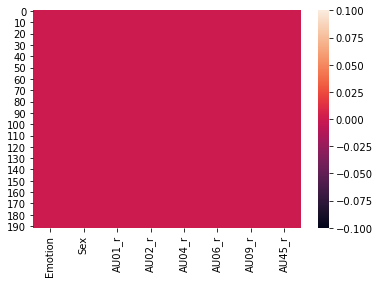

In [6]:
# Here, we can visualize what values are null as well as what data type each column represent

sb.heatmap(data.isnull())
data.info()

### Replacing any object data types

In [7]:
# We have to convert categorical columns to binary values
# We can create dummy columns for the columns we want to convert...concatenate it with our data and then drop them
# Here, the column for Sex is an object data type

SexDummy = pd.get_dummies(data['Sex'])
data=pd.concat((data, SexDummy), axis=1)
data.head(10)

,Emotion,Sex,AU01_r,AU02_r,AU04_r,AU06_r,AU09_r,AU45_r,F,M
0,1,F,0.000000,0.054352,0.064815,0.814074,0.488148,0.121481,1,0
1,1,F,0.832952,1.207619,0.004000,1.197143,1.073714,0.716476,1,0
2,1,F,0.058952,0.017048,0.417810,1.778381,0.394571,0.378190,1,0
3,1,F,0.887143,1.542762,0.005905,1.533048,0.865333,1.576095,1,0
4,1,F,0.713714,1.944952,0.000000,0.447905,0.161524,0.470857,1,0
5,1,F,0.481273,0.015273,0.054455,0.947364,0.197909,0.426000,1,0
6,1,F,0.116909,0.014818,0.171182,1.010273,0.578545,0.493000,1,0
7,1,F,0.000000,0.141351,0.000000,2.088468,0.937207,0.962523,1,0
8,1,F,0.481569,1.448431,0.011961,1.261863,0.378431,0.769902,1,0
9,1,F,1.191038,2.081887,0.001132,0.419623,0.233774,0.616698,1,0


### Dropping any object data types after they are concatenated

In [8]:
data = data.drop(['Sex'], axis=1)
data.head(10)

# Column Emotion: Happy=1, Sad=0
# Column F = Female = 1
# Column M = Male = 0

,Emotion,AU01_r,AU02_r,AU04_r,AU06_r,AU09_r,AU45_r,F,M
0,1,0.000000,0.054352,0.064815,0.814074,0.488148,0.121481,1,0
1,1,0.832952,1.207619,0.004000,1.197143,1.073714,0.716476,1,0
2,1,0.058952,0.017048,0.417810,1.778381,0.394571,0.378190,1,0
3,1,0.887143,1.542762,0.005905,1.533048,0.865333,1.576095,1,0
4,1,0.713714,1.944952,0.000000,0.447905,0.161524,0.470857,1,0
5,1,0.481273,0.015273,0.054455,0.947364,0.197909,0.426000,1,0
6,1,0.116909,0.014818,0.171182,1.010273,0.578545,0.493000,1,0
7,1,0.000000,0.141351,0.000000,2.088468,0.937207,0.962523,1,0
8,1,0.481569,1.448431,0.011961,1.261863,0.378431,0.769902,1,0
9,1,1.191038,2.081887,0.001132,0.419623,0.233774,0.616698,1,0


### Creating a targeted column

In [9]:
# The column for Emotion will be our target variable

x = data.values
y = data['Emotion'].values

In [10]:
# We don't want our choosen y values in the x values
# So we delete the Emotion column from x values

x = np.delete(x,0,axis=1)

### Splitting Data

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
y_test.mean()

0.41025641025641024

### Gaussian Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
nb.score(x_test, y_test)

0.8205128205128205

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test,y_test)

0.8974358974358975

### SVM

In [36]:
from sklearn.svm import SVC

#sv = SVC(probability=True,kernel='linear',C=5)
#sv = SVC(probability=True,kernel='poly',C=5)
sv = SVC(probability=True,kernel='rbf',C=5)
sv.fit(x_test, y_test)
sv.score(x_test,y_test)

0.9743589743589743

### Random Forest

In [37]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier(n_estimators=1000)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9487179487179487

### K-NN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)


0.8974358974358975

### Probabilities for our prediction

In [64]:
random_probs=[0 for _ in range(len(y_test))]

nb_probs=nb.predict_proba(x_test)
rf_probs=rf.predict_proba(x_test)
knn_probs=knn.predict_proba(x_test)
lr_probs=lr.predict_proba(x_test)
sv_probs=sv.predict_proba(x_test)


### Probabilities for one outcome 

In [65]:
# Happy is represented by 1, we can find the probability for this outcome 

nb_probs=nb_probs[:,1]
rf_probs=rf_probs[:,1]
knn_probs=knn_probs[:,1]
lr_probs=lr_probs[:,1]
sv_probs=sv_probs[:,1]

### Finding AUROC Scores

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score

# Random prediction that splits data into two
random_auc = roc_auc_score(y_test,random_probs)

# Area under the curve for all other classifiers we tested
nb_auc = roc_auc_score(y_test,nb_probs)
rf_auc = roc_auc_score(y_test,rf_probs)
knn_auc = roc_auc_score(y_test,knn_probs)
lr_auc = roc_auc_score(y_test,lr_probs)
sv_auc = roc_auc_score(y_test,sv_probs)

### Calculating the ROC Curve

In [67]:
# Calculates ROC curve for a random prediction that splits data into two
random_fpr, random_tpr, _ = roc_curve(y_test,random_probs)

# Calculates ROC curve for all other classifiers
nb_fpr, nb_tpr, _ = roc_curve(y_test,nb_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test,rf_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test,knn_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test,lr_probs)
sv_fpr, sv_tpr, _ = roc_curve(y_test,sv_probs)

### ROC plot for all classification algorithms

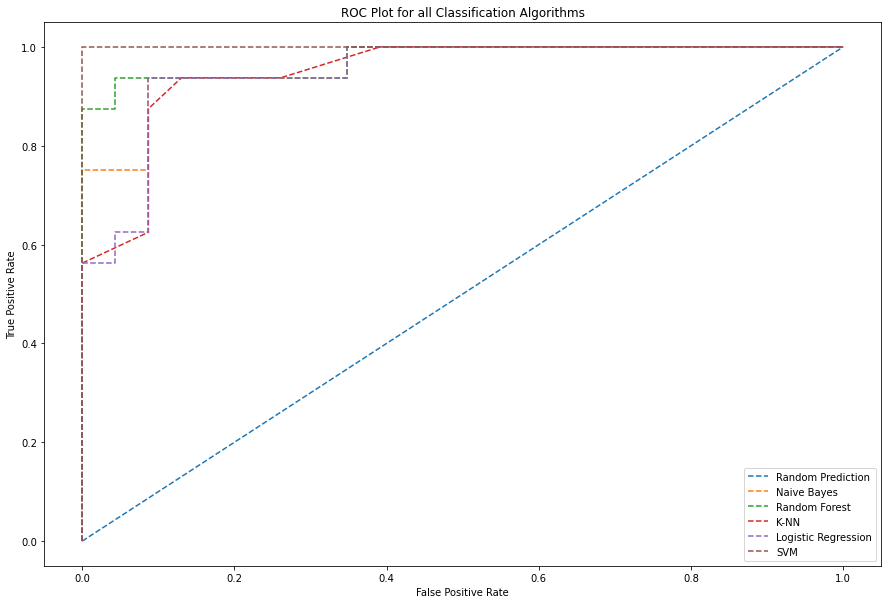

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

plt.plot(random_fpr, random_tpr, linestyle='--', label='Random Prediction' %random_auc)
plt.plot(nb_fpr, nb_tpr, linestyle='--', label='Naive Bayes' %nb_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest' %rf_auc)
plt.plot(knn_fpr, knn_tpr, linestyle='--', label='K-NN' %knn_auc)
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='Logistic Regression' %lr_auc)
plt.plot(sv_fpr, sv_tpr, linestyle='--', label='SVM' %sv_auc)

plt.title('ROC Plot for all Classification Algorithms')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

### Printing AUROC Values

In [69]:

print('Random Prediction AUROC = %3f' %(random_auc))

print('Naive Bayes AUROC = %3f' %(nb_auc))
print('Random Forest AUROC = %3f' %(rf_auc))
print('K-NN AUROC = %3f' %(knn_auc))
print('Logistic Regression AUROC = %3f' %(lr_auc))
print('SVM = %3f' %(sv_auc))



Random Prediction AUROC = 0.500000
Naive Bayes AUROC = 0.961957
Random Forest AUROC = 0.975543
K-NN AUROC = 0.948370
Logistic Regression AUROC = 0.948370
SVM = 1.000000
